# Pymoo Notebook

https://katex.org/docs/supported.html

https://pymoo.org/
https://github.com/anyoptimization/pymoo

## Contents
* [Github Test Code](#test)
* [Preface: Basics and Challenges](#PT0)
* [Part I: A Constrained Bi-objective Optimization Problem](#PT1)
* [Part II: Find a Solution Set using Multi-objective Optimization](#PT2)
* [Part III: Multi-Criteria Decision Making](#PT3)
* [Part III: Multi-Criteria Decision Making](#PT4)
* [Part IV: Analysis of Convergence](#PT5)
* [Source Code](#SC)
* [API]

# Test Code <a class='anchor' id='test'></a>

In [120]:
import sys

In [121]:
# !pip install -U pymoo

n_gen |  n_eval |     igd      |      gd      |      hv     
    1 |     100 |  1.968750093 |  2.604804832 |  0.00000E+00
    2 |     200 |  1.734489567 |  2.581573950 |  0.00000E+00
    3 |     300 |  1.734489567 |  2.459669453 |  0.00000E+00
    4 |     400 |  1.734489567 |  2.494031231 |  0.00000E+00
    5 |     500 |  1.717832911 |  2.121980227 |  0.00000E+00
    6 |     600 |  1.185966215 |  2.078544110 |  0.00000E+00
    7 |     700 |  1.185966215 |  2.085332953 |  0.00000E+00
    8 |     800 |  1.034422085 |  1.967599712 |  0.00000E+00
    9 |     900 |  1.031204325 |  1.672868174 |  0.00000E+00
   10 |    1000 |  0.957837861 |  1.328719106 |  0.00000E+00
   11 |    1100 |  0.949759789 |  1.316097258 |  0.00000E+00
   12 |    1200 |  0.884360161 |  1.269278705 |  0.00000E+00
   13 |    1300 |  0.850114718 |  1.187657401 |  0.00000E+00
   14 |    1400 |  0.830429218 |  1.031565288 |  0.00000E+00
   15 |    1500 |  0.735030226 |  1.032345638 |  0.015573226
   16 |    1600 |  0.697

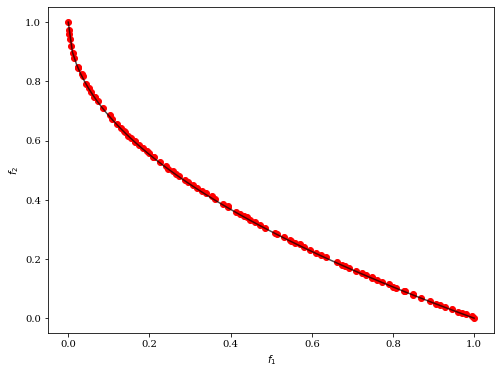

In [122]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_problem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter

problem = get_problem("zdt1")

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ('n_gen', 200),
               seed=1,
               verbose=True)

plot = Scatter()
plot.add(problem.pareto_front(), plot_type="line", color="black", alpha=0.7)
plot.add(res.F, color="red")
plot.show()

# **Preface: Basics and Challenges** <a class='anchor' id='PT0'></a>

Without any loss of generality an optimization problem can be defined by:

$$

\begin{array}{cc}
min & f_m(x) & m=1,..,M \\
s.t. & g_j(x)≤0 & j=1,..,J \\
& h_k(x)=0 & ek=1,..,K \\
& x^L_i & i=1,..,N \\
& x∈Ω & \\
\end{array}

$$

where
* $x_i$ represents the $i$-th variable to be optimized,
* $x^L_i$ and $x^U_i$ its lower and upper bound, 
* $f_m$ the $m$-th objective function,
* $g_j$ the $j$−th inequality constraint and
* $h_k$ the $k$-th equality constraint.


The objective function(s) $f$ are supposed to be minimized by satisfying all equality and inequality constraints.

If a specific objective function is maximized $(maxf_i)$,

one can redefine the problem to minimize its negative value $(min−f_i)$.

Instead of starting coding your problem immediately, it is recommendable to first think about the mathematical problem formulation. Doing so makes you being aware of the complete optimization problem. This also helps you to identify the challenging facets of your optimization problem and, thus, to select a suitable algorithm. In this guide, we will demonstrate an example of a multi-objective problem, use
<span style='color:hotpink'>pymoo</span>
to obtain a solution set, and theoretically derive the optimum for verification purposes.

> **TIP**
<br>
If you are new to multi-objective optimization and are not familiar with essential concepts, a look into “Multi-Objective Optimization Using Evolutionary Algorithms ” by Kalyanmoy Deb might be a good starting point.

If you have some experience solving optimization problems, the following might already be apparent to you. However, if you are new to optimization, thinking about your problem’s characteristics is vital. In the following a few common facts and challenges to consider when intending to solve a (real-world) optimization problem are discussed:

**Variable Types.**
<br> The variables span the search
<span style='color:hotpink'>space $Ω$</span>
of your optimization problem. Thus, the
<span style='color:hotpink'>type of variables</span>
is an essential aspect of the problem to be paid attention to. Different variables types, such as
<span style='color:turquoise'>
continuous, discrete/integer, binary, or permutation,
</span>
define the characteristics of the search space. In some cases, the variable types might be even mixed, which increases the complexity further.

**Number of Variables.**
<br> Not only the type but also the
<span style='color:hotpink'>
number of variables $(N)$
</span>
is essential. For either a very small or large number, different algorithms are known to work more efficiently. You can imagine that solving a problem with only ten variables is fundamentally different from solving one with a couple of thousand. For large-scale optimization problems, even the second-order derivate becomes computationally very expensive, and efficiently handling the memory plays a more important role.

**Number of Objectives.**
<br>
Some optimization problems have more than one
<span style='color:hotpink'>
conflicting objective $(M>1)$
</span>
to be optimized. Before researchers have investigated multi-objective optimization, single-objective problems were the main focus. Single-objective optimization is only a particular case where
<span style='color:hotpink'>
$M=1.$
</span>
<br>
<br>
In multi-objective optimization, the solution’s domination relation generalizes the comparison of
<span style='color:hotpink'>
two scalars
</span>
in single-objective optimization. Moreover, having more than one dimension in the objective space, the optimum (most of the time) consists of a set of
<span style='color:hotpink'>
non-dominated solutions.
</span>
Because a set of solutions should be obtained,
<span style='color:hotpink'>
**population-based algorithms**
</span>
have mainly been used as solvers.

**Constraints.**
<br>
Optimization problems have two types of constraints,

* <span style='color:hotpink'>inequality $(g)$</span>
and
* <span style='color:hotpink'>equality $(h)$</span>
constraints.

From an end-user perspective, constraints have a priority over
<span style='color:hotpink'>
*objective values*.
</span>
No matter how good the solution’s objectives are, it is considered infeasible if it turns out to violate just a single constraint. Constraints can have a big impact on the complexity of the problem.
<br>

For instance, if only a few islands in the search space are feasible or a large number of constraints $(|J|+|K|)$ need to be satisfied. For genetic algorithms satisfying equality constraints can be rather **challenging.** Thus, this needs to be addressed differently, for instance, by mapping the search space to a utility space where the equality constraints are always satisfied or injecting the knowledge of the equality constraint through customization.

**Multi-modality.**
<br>Most aspects discussed so far are most likely known or to be relatively easy to define. However, the nature of the
<span style='color:hotpink'>
fitness landscape
</span>
is less obvious bet yet essential to be aware of. In the case of multi-modal fitness landscapes, optimization becomes inevitably more difficult due to the existence of a few or even many local optima. For the solution found, one must always ask if the method has explored *enough regions* in the search space to maximize the probability of obtaining the 
<span style='color:hotpink'>
global optimum.
</span>
A multi-modal search space quickly shows the limitation of local search, which can easily get stuck.

**Differentiability.**
<br>A function being differentiable implies the **first or even second-order derivative** can be calculated. Differentiable functions allow
<span style='color:hotpink'>
gradient-based optimization methods
</span>
to be used, which can be a great advantage over gradient-free methods. The gradient provides a good indication of what **direction** shall be used for the search. Most gradient-based algorithms are point-by-point based and can be highly efficient for rather unimodal fitness landscapes. However, in practice, often functions are
<span style='color:hotpink'>
non-differentiable,
</span>
or a more complicated function requires a global instead of a local search. The research field addressing problems without knowing their mathematical optimization is also known as
<span style='color:hotpink'>
black-box optimization.
</span>

**Evaluation Time.**
<br>Many optimization problems in practice consist of complicated and lengthy mathematical equations or
<span style='color:hotpink'>
domain-specific software
</span>
to be evaluated. The usage of third-party software often results in a computationally expensive and time-consuming function for evaluating objectives or constraints. For those types of problems, the algorithm’s overhead for determining the next solutions to be evaluated is often neglectable. A commercial software performing an evaluation often comes with various more practical issues such as distributed computing, several instances to be used in parallel and software license, and the software’s possible failure for specific design variable combinations.

**Uncertainty.**
<br>Often it is assumed that the objective and constraint functions are of a deterministic manner. However, if one or multiple target functions are nondeterministic, this introduces noise or also referred to as uncertainty. One technique to address the underlying randomness is to 
**repeat the evaluation for different random seeds and average the resulting values.**
Moreover, the standard deviation derived from multiple evaluations can be utilized to determine the performance and the reliability of a specific solution. In general, optimization problems with underlying uncertainty are investigated by the research field called stochastic optimization.

Of course, this shall not be an exhaustive list of problem characteristics but rather an idea of how fundamentally different optimization problems are. Being aware of possible challenges, one can make better decisions regarding a method and its suitability. In this tutorial, solving a constrained bi-objective optimization problem is demonstrated. This, and your problem’s characteristics, shall help you to use pymoo as a toolbox to tackle your optimization problem.

# **Part I: A Constrained Bi-objective Optimization Problem** <a class='anchor' id='PT1\'></a>

In the following, we investigate exemplarily a
<span style='color:hotpink'>
bi-objective optimization with two constraints.
</span>
We have tried to select a suitable optimization problem with enough complexity for demonstration purposes, but not too difficult to lose track of the overall idea. Its definition is given by:

$$

\begin{array}{cc}
min & f_m(x) & m=1,..,M \\
s.t. & g_j(x)≤0 & j=1,..,J \\
 & h_k(x)=0 & ek=1,..,K \\
 & x^L_i & i=1,..,N \\
  & x∈Ω & \\
\end{array}

$$

As already discussed in the Preface, let an optimization problem be defined by:



$$
\begin{alignat}{}
min \,\,\, f_1(x)=100(x^2_1+x^2_2) \\

max \,\,\, f_2(x)=−(x_1−1)^2−x^2_2 \\

s.t. \,\,\, g_1(x)=2(x1−0.1)(x1−0.9)≤0 \\

g_2(x)=20(x_1−0.4)(x_1−0.6)≥0 \\

−2≤x_1≤2 \\

−2≤x_2≤2 \\

x∈R
\end{alignat}

$$

The the example problem to be solved in this getting started guide is given by:



The problem consists of two objectives $(M=2)$ where $f_1(x)$ is minimized and $f_2(x)$ maximized. The optimization is subject to two inequality constraints $(J=2)$ where $g_1(x)$ is formulated as a less than and $g_2(x)$ as a greater than constraint. The problem is defined with respect to two variables $(N=2)$, $x_1$ and $x_2$, both in the range $[−2,2].$ The problem does not contain any equality constraints $(K=0).$

> **Note**
<br>
Next, we derive the optimum for the given optimization problem. It is worth pointing out that this is not a requirement for pymoo and is just done for verification purposes here. Moreover, this is a valuable exercise to understand the design and objective space mapping.

Let us analyze where the Pareto-optimal solutions have to lie.
* The first objective $f_1$ is minimized at $(0,0)$,
whereas
* The second object $f_2$ at $(1,0).$
<br>

Because both functions are of quadratic nature, the optimum is given by a straight line between the two optima. This means all Pareto-optimal solutions (ignoring the constraints for now) have in common that $x_2=0$ and $x_1∈(0,1)$. The first constraint only relies on $x_1$ and is satisfied if $x_1∈(0.1,0.9).$ The second constraint $g_2$ is satisfied for $x_1∈(0.4,0.6).$ This means analytically, the pareto-optimal set is given by
$PS={(x_1,x_2)|(0.1≤x1≤0.4)∨(0.6≤x1≤0.9)∧x2=0}.$

In [6]:
import numpy as np

In [7]:
X1, X2 = np.meshgrid(np.linspace(-2, 2, 500), np.linspace(-2, 2, 500))

F1 = X1**2 + X2**2
F2 = (X1-1)**2 + X2**2
G = X1**2 - X1 + 3/16

G1 = 2 * (X1[0] - 0.1) * (X1[0] - 0.9)
G2 = 20 * (X1[0] - 0.4) * (X1[0] - 0.6)

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', family='serif')

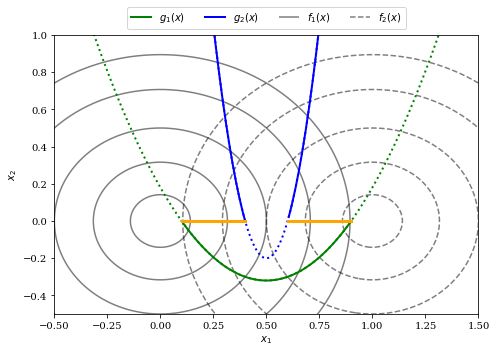

In [9]:
levels = [0.02, 0.1, 0.25, 0.5, 0.8]
plt.figure(figsize=(7, 5))
CS = plt.contour(X1, X2, F1, levels, colors='black', alpha=0.5)
CS.collections[0].set_label("$f_1(x)$")

CS = plt.contour(X1, X2, F2, levels, linestyles="dashed", colors='black', alpha=0.5)
CS.collections[0].set_label("$f_2(x)$")

plt.plot(X1[0], G1, linewidth=2.0, color="green", linestyle='dotted')
plt.plot(X1[0][G1<0], G1[G1<0], label="$g_1(x)$", linewidth=2.0, color="green")

plt.plot(X1[0], G2, linewidth=2.0, color="blue", linestyle='dotted')
plt.plot(X1[0][X1[0]>0.6], G2[X1[0]>0.6], label="$g_2(x)$",linewidth=2.0, color="blue")
plt.plot(X1[0][X1[0]<0.4], G2[X1[0]<0.4], linewidth=2.0, color="blue")

plt.plot(np.linspace(0.1,0.4,100), np.zeros(100),linewidth=3.0, color="orange")
plt.plot(np.linspace(0.6,0.9,100), np.zeros(100),linewidth=3.0, color="orange")

plt.xlim(-0.5, 1.5)
plt.ylim(-0.5, 1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.12),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

The figure below shows the problem’s functions in the design space and might help to see the relationship between the functions intuitively. The contour lines of the objective function $f_1(x)$ is represented by a solid and $f_2(x)$ by a dashed line. The constraints $g_1(x)$ and $g_2(x)$ are parabolas which intersect the $x_1$-axis at $(0.1,0.9)$ and $(0.4,0.6).$
A thick orange line illustrates the
<span style='color:orange'>
Pareto-optimal set.
</span>
When considering both constraints together, the Pareto-set shown in orange is split into two parts as analytically derived above.

Next, we derive the Pareto-front by mapping the Pareto-set to the objective space. The Pareto-front equation is based on $f_2$ depending on the variable of $f_1$. We know that at the optimum $x_2=0$ which means we can simplify the objective functions to $f_1(x)=100x^2_1$ and $f_2(x)=−(x_1−1)^2.$ The first objective $f_1$ can be reformulated to $x_1=\sqrt[]{\frac{f1}{100}}$ and then be put into the second objective which results in

$$

f_2 =−(  \sqrt[]{\frac{f1}{100}} - 1)^2

$$

The equation defines the shape, however,
<span style='color:hotpink'>
next all possible values for $f_1$
</span>
need to be defined.

As shown before the Pareto-set is defined for
$(0.1≤x1≤0.4) ∨ (0.6≤x1≤0.9)∧x2=0.$

If we plug in the values for
$x_1$
into
$f_1$
we get the points of interest
$[1,16]$
and
$[36,81].$
Thus the Pareto-front is given by:

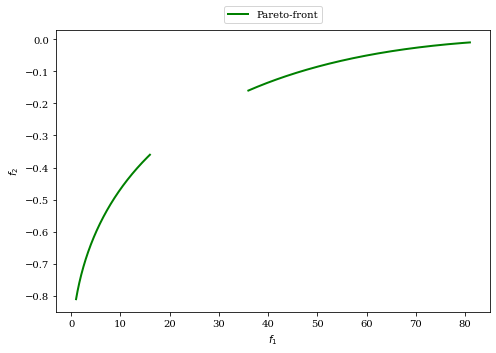

In [10]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5))

f2 = lambda f1: - ((f1/100) ** 0.5 - 1)**2
F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
F2_a, F2_b = f2(F1_a), f2(F1_b)

plt.rc('font', family='serif')
plt.plot(F1_a,F2_a, linewidth=2.0, color="green", label="Pareto-front")
plt.plot(F1_b,F2_b, linewidth=2.0, color="green")

plt.xlabel("$f_1$")
plt.ylabel("$f_2$")

plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.10),
          ncol=4, fancybox=True, shadow=False)

plt.tight_layout()
plt.show()

As a quick check, we shall verify if this is a non-dominated set. Keeping in mind that the first objective is minimized and the second maximized for this optimization problem, a better solution lies on the top left. This means the derived Pareto-front makes sense.

> **Hint**
<br>
Researchers have developed all kinds of test problems and derived their optima from designing and comparing suitable optimization algorithms. However, deriving the Pareto-set and Pareto-front from a mathematical problem formulation can become quite challenging for more complicated problems or not even be possible. Also, not all algorithms can be put into a math equation and might be of a black-box nature. Thus, we use optimization algorithms to find (near-optimal) solutions using well-benchmarked algorithms.

# **Part II: Find a Solution Set using Multi-objective Optimization** <a class='anchor' id='PT2'></a>

The constrained bi-objective problem from Part I was defined by



$$
\begin{alignat}{}
min \,\,\, f_1(x)=100(x^2_1+x^2_2) \\

max \,\,\, f_2(x)=−(x_1−1)^2−x^2_2 \\

s.t. \,\,\, g_1(x)=2(x1−0.1)(x1−0.9)≤0 \\

g_2(x)=20(x_1−0.4)(x_1−0.6)≥0 \\

−2≤x_1≤2 \\

−2≤x_2≤2 \\

x∈R
\end{alignat}

$$

To implement the problem in **pymoo** some more work has to be done.



> **Problem Definition**
<br>
Most optimization frameworks commit to either minimize or maximize all objectives and to have only ≤ or ≥ constraints. In pymoo, each objective function is supposed to be *minimized*, and each constraint needs to be provided in the form of $≤0.$

Thus, we need to multiple an objective that is supposed to be maximized by $−1$ and minimize it. This results in minimizing $−f_2(x)$ instead of maximizing $f_2(x).$
Moreover, the
<span style='color:hotpink'>
inequality constraints
</span>
need to be formulated as less than zero $(≤0)$ constraint. For this reason, $g_2(x)$ is multiplied by $−1$ in order to flip inequality relation. Also, we recommend the normalization of constraints to make them operating on the same scale and giving them equal importance. For $g_1(x)$, the
<span style='color:hotpink'>
coefficient
</span>
results in $2⋅(−0.1)⋅(−0.9)=0.18$ and for $g_2(x)$ in $20⋅(−0.4)⋅(−0.6)=4.8$, respectively. We achieve normalization of constraints by dividing $g_1(x)$ and $g_2(x)$ by its corresponding coefficient.

After these reformulations the problem to be implemented is given by:



$$
\begin{alignat}{}
min \,\,\, f_1(x)=100(x^2_1+x^2_2) \\

min \,\,\, f_2(x)=(x_1−1)^2+x^2_2 \\

s.t. \,\,\, g_1(x)=2(x1−0.1)(x1−0.9)/0.18≤0 \\

g_2(x)=-20(x_1−0.4)(x_1−0.6)/4.8≤0 \\

−2≤x_1≤2 \\

−2≤x_2≤2 \\

x∈R
\end{alignat}

$$

## Implement the Problem

After having formulated the problem the right way, we can start implementing it. In this tutorial we the
<span style='color:hotpink'>
element-wise problem definition,
</span>
which is one out of three different ways for implementing a problem. We define a new Python objective inheriting from
<span style='color:hotpink'>ElementwiseProblem</span>
and set the correct attributes, such as the number of objectives (
<span style='color:hotpink'>n_obj</span>
) and constraints (
<span style='color:hotpink'>n_constr</span>
) and the lower (
<span style='color:hotpink'>x1</span>
) and upper bounds (
<span style='color:hotpink'>xu</span>
). The function being responsible for the evaluation is _evaluate which shall be implemented next. The function’s interface is the parameters x and out.
<br>
<br>For this element-wise implementation x is a one-dimensional NumPy array of length n_var which represents a single solution to be evaluated. The output is supposed to be written to the dictionary out. The objective values should be written to <span style='color:hotpink'>out["F"]</span>
as a list of NumPy array with length of
<span style='color:hotpink'>n_obj</span>
and the constraints to
<span style='color:hotpink'>out["G"]</span>
with length of
<span style='color:hotpink'>n_constr</span>
(if the problem has constraints to be satisfied at all).

In [ ]:
<span style='color:hotpink'></span>

In [11]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

> **Tip**
<br>
A problem can be defined in a couple of different ways. Above, the implementation of an
**element-wise**
implementation is demonstrated, which means the _evaluate is called for each solution x at a time. Other ways of implementing a problem are
**vectorized,**
where x represents a whole set of solutions or a functional and probably more pythonic way by providing for each objective and constraint as a
**function.**
For more details, please have a look at the Problem tutorial.

If you use pymoo as a researcher trying to improve existing algorithms, you might want to have a look at the varierity of single- and many-objective optimization test problems already implemented.

* [Optimization Test Problems](https://pymoo.org/problems/index.html)
* [Define a Custom Problem](https://pymoo.org/problems/definition.html)
* [Parallelization](https://pymoo.org/problems/parallelization.html)
* [Callback](https://pymoo.org/interface/callback.html)
* [Constraint Handling](https://pymoo.org/misc/constraints.html)

## Initialize an Algorithm

The reason why you became aware of this framework, is probably the existence of an algorithm you like to use. pymoo follows an object oriented approach and, thus, we have to define an algorithm object next.
<br>
<br>
Depending on the optimization problem, different algorithms will perform better or worse on different kind of problems. It is recommendable to first understand the intuition behind an algorithm and then select one which seems to be most suitable for solving your optimization problem. A list of algorithms which are available in pymoo is available
[here.](https://pymoo.org/algorithms/index.html)
<br>
<br>
In our case, the optimization problem is rather simple, but the aspect of having two objectives and two constraints should be considered. Thus, let us select the well-known multi-objective algorithm
[NSGA-II.](https://pymoo.org/algorithms/moo/nsga2.html)
<br>
<br>
For the majority of algorithms you could either choose the default hyper-parameters or create your own version of the algorithm by modifying them. For instance, for this relatively simple problem we choose a population size of 40 (
<span style='color:hotpink'>pop_size=40</span>
) and with only 10 (
<span style='color:hotpink'>n_offsprings=10</span>
) in each generation. Such an implementation is a greedier variant and improves the convergence of simpler optimization problems without major difficulties regarding optimization, such as the existence of local Pareto-fronts.
<br>
<br>
Moreover, we enable a duplicate check (
<span style='color:hotpink'>eliminate_duplicates=True</span>
), making sure that the mating produces offsprings that are different from themselves and the existing population regarding their design space values.

In [12]:
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.factory import get_sampling, get_crossover, get_mutation

algorithm = NSGA2(
    pop_size=40,
    n_offsprings=10,
    sampling=get_sampling("real_random"),
    crossover=get_crossover("real_sbx", prob=0.9, eta=15),
    mutation=get_mutation("real_pm", eta=20),
    eliminate_duplicates=True
)

The
<span style='color:hotpink'>algorithm</span>
object contains an implementation of NSGA-II with the custom configuration discussed above. The object can now be used to start an optimization run.

> **Tip**
<br>
The documentation is designed to make it easy to get started and to copy code for each of the algorithms. However, please be aware that each algorithm comes with all kinds of hyper-parameters to be considered. If an algorithm turns out not to show a good convergence behavior, we encourage you to try different algorithm configurations. For instance, for population-based approaches the population size and number of offsprings, as well as the parameters used for recombination operators are a good starting point.



## Define a Termination Criterion

Furthermore, a termination criterion needs to be defined to start the optimization procedure. Most common ways of defining the termination is by limiting the overall number of function evaluations or simply the number of iterations of the algorithm. Moreover, some algorithms already have implemented their own, for instance Nelder-Mead when the simplex becomes degenerated or CMA-ES where a vendor library is used. Because of the simplicity of this problem we use a rather small number of 40 iteration of the algorithm.

In [38]:
from pymoo.factory import get_termination

termination = get_termination("n_gen", 40)

> **Tip**
<br>
A convergence analysis will show how much progress an algorithm has made at what time. Always keep in mind that having the most suitable algorithm but running it not long enough might prevent from finding the global optimum. However, continuing with optimization of an algorithm that got stuck or has already found the optimum will not improve the best found solution and unnecessarily increase the number of function evaluations.

You can find a list and explanations of termination criteria available in pymoo [here.](https://pymoo.org/interface/termination.html) If no termination criteria is defined, then the progress in the design and objective space will kept track of in each iteration. When no significant progress has been made (this is the art of defining what that shall be), the algorithm terminates.



## Optimize

Finally, we are solving the
<span style='color:hotpink'>problem</span>
with the
<span style='color:hotpink'>algorithm</span>
and
<span style='color:hotpink'>termination</span>
we have defined. The functional interface uses the
<span style='color:hotpink'>minimize</span>
method. By default, the
<span style='color:hotpink'>minimize</span>
performs deep-copies of the algorithm and the termination object which guarantees they are not modified during the function call. This is important to ensure that repetitive function calls with the same random seed end up with the same results. When the algorithm has been terminated, the
<span style='color:hotpink'>minimize</span>
function returns a
[Result](https://pymoo.org/interface/result.html)
object

In [14]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               termination,
               seed=1,
               save_history=True,
               verbose=True)

X = res.X
F = res.F

n_gen |  n_eval |   cv (min)   |   cv (avg)   |  n_nds  |     eps      |  indicator  
    1 |      40 |  0.00000E+00 |  2.36399E+01 |       1 |            - |            -
    2 |      50 |  0.00000E+00 |  1.15486E+01 |       1 |  0.00000E+00 |            f
    3 |      60 |  0.00000E+00 |  5.277918607 |       1 |  0.00000E+00 |            f
    4 |      70 |  0.00000E+00 |  2.406068542 |       2 |  1.000000000 |        ideal
    5 |      80 |  0.00000E+00 |  0.908316880 |       3 |  0.869706146 |        ideal
    6 |      90 |  0.00000E+00 |  0.264746300 |       3 |  0.00000E+00 |            f
    7 |     100 |  0.00000E+00 |  0.054063822 |       4 |  0.023775686 |        ideal
    8 |     110 |  0.00000E+00 |  0.003060876 |       5 |  0.127815454 |        ideal
    9 |     120 |  0.00000E+00 |  0.00000E+00 |       6 |  0.085921728 |        ideal
   10 |     130 |  0.00000E+00 |  0.00000E+00 |       7 |  0.015715204 |            f
   11 |     140 |  0.00000E+00 |  0.00000E+00 |       

If the
<span style='color:hotpink'>verbose=True</span>
, some printouts during the algorithm’s execution are provided. This can very from algorithm to algorithm. Here, we execute
<span style='color:hotpink'>NSGA2</span>
on a problem where pymoo has no knowledge about the optimum.
<br>
<br>
Each line represents one iteration. The first two columns are the current generation counter and the number of evaluations so far. For constrained problems, the next two columns show the minimum constraint violation (cv (min)) and the average constraint violation (cv (avg)) in the current population.
<br>
<br>
This is followed by the number of non-dominated solutions (n_nds) and two more metrics which represents the movement in the objective space.

> **Tip**
<br>
An algorithm can be executed by using the minimize interface as shown below. In order to have more control over the algorithm execution, pymoo also offers an object-oriented execution. For an example and a discussion of each’s pros and cons, please consult or algorithm tutorial.



## Visualize

Analyzing the solutions being found by the algorithm is vital. Always a good start is visualizing the solutions to get a grasp of commonalities or if the Pareto-front is known to even check the convergence.

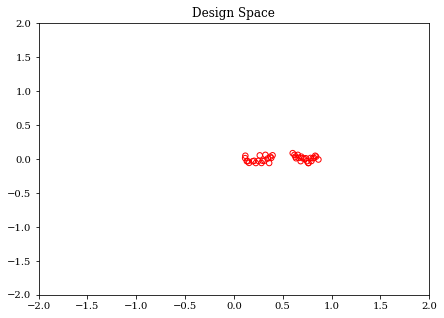

In [15]:
import matplotlib.pyplot as plt
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(X[:, 0], X[:, 1], s=30, facecolors='none', edgecolors='r')
plt.xlim(xl[0], xu[0])
plt.ylim(xl[1], xu[1])
plt.title("Design Space")
plt.show()

# **Part III: Multi-Criteria Decision Making** <a class='anchor' id='PT3'></a>

Having now obtained a set of non-dominated solutions, one can ask how a decision-maker can nail down the set to only a few or even a single solution. This decision-making process for multi-objective problems is also known as Multi-Criteria Decision Making (MCDM). You should know that the main focus of pymoo lies in the optimization, not the MCDM part. However, the framework offers some rudimentary tools to find an appropriate solution.
<br>
<br>
The Pareto-optimal solutions obtained from the optimization procedure are given by:

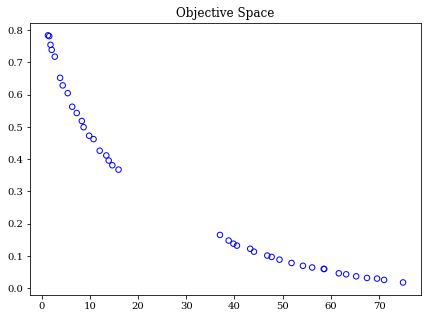

In [16]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

Before we start using any technique, we should note that the objectives have a different scale. What has not been a problem for single-objective optimization because not more than one dimension existed now becomes fundamentally important to consider.

In [17]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.3377795039158735, 74.97223429467643]
Scale f2: [0.01809179532919018, 0.7831767823138307]


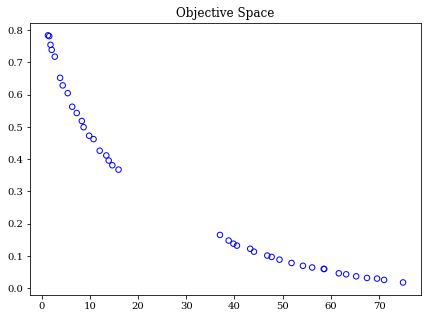

In [18]:
F = res.F
xl, xu = problem.bounds()
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

In [19]:
fl = F.min(axis=0)
fu = F.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

Scale f1: [1.3377795039158735, 74.97223429467643]
Scale f2: [0.01809179532919018, 0.7831767823138307]


As one can observe, the lower and upper bounds of the objectives f1 and f2 are very different, and such normalization is required.

> **Warning**
<br>
Without normalization, we are comparing oranges with apples. The first objective will dominate any distance calculation in the objective space because of its larger scale. Handling different scales of objectives is an inherent part of any multi-objective algorithms, and, thus, we need to do the same for post-processing.

A common way is normalizing using the so-called ideal and nadir point. However, for the decision-making purpose here and the sake of generalization, we assume the ideal and nadir points (also referred to as boundary points) and the Pareto-front) are not known. Thus the points can be approximated by:

In [20]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

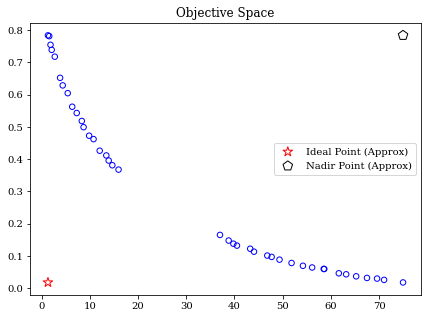

In [137]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(approx_ideal[0], approx_ideal[1], facecolors='none', edgecolors='red', marker="*", s=100, label="Ideal Point (Approx)")
plt.scatter(approx_nadir[0], approx_nadir[1], facecolors='none', edgecolors='black', marker="p", s=100, label="Nadir Point (Approx)")
plt.title("Objective Space")
plt.legend()
plt.show()

Normalizing the obtained objective values regarding the boundary points is relatively simple by:

Scale f1: [0.0, 1.0]
Scale f2: [0.0, 1.0]


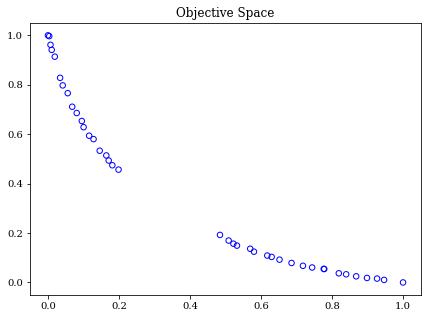

In [138]:
nF = (F - approx_ideal) / (approx_nadir - approx_ideal)

fl = nF.min(axis=0)
fu = nF.max(axis=0)
print(f"Scale f1: [{fl[0]}, {fu[0]}]")
print(f"Scale f2: [{fl[1]}, {fu[1]}]")

plt.figure(figsize=(7, 5))
plt.scatter(nF[:, 0], nF[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.title("Objective Space")
plt.show()

## Compromise Program

Without going into too much detail in this getting started guide, one way for decision-making is using decomposition functions. They require the definition of weights that reflect the user’s wishes. A vector gives the weights with only positive float numbers summing up to one and a length equal to the number of objectives.
<br>
<br>
Here for a bi-objective problem, let us assume the first objective is less a bit less important than the second objective by setting the weights to

In [139]:
weights = np.array([0.2, 0.8])

Next, we choose the decomposition method called Augmented Scalarization Function (ASF), a well-known metric in the multi-objective optimization literature.

In [140]:
from pymoo.decomposition.asf import ASF

decomp = ASF()

Now let us obtain the best solution regarding the ASF. Because ASF is supposed to be minimized, we choose the minimum ASF values calculated from all solutions. You might be wondering why the weights are not passed directly, but
<span style='color:hotpink'>1/weights.</span>
<br>
<br>
For ASF, different formulations exist, one where the values are divided and one where they are multiplied. In pymoo, we divide, which does not reflect the idea of the user’s criteria. Thus, the inverse needs to be applied. No worries if this is too much detail for now; however, decision-making about decomposition techniques is vital.

In [141]:
i = decomp.do(nF, 1/weights).argmin()

After having found a solution (i) we can operate on the original scale to represent the results:

Best regarding ASF: Point 
i = 21
F = [43.28059434  0.12244878]


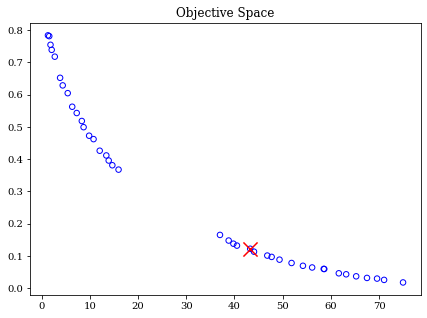

In [142]:
print("Best regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

> **Tip**
<br>
<br>
One benefit of this approach is that any kind of decomposition function can be used.



## Pseudo-Weights

A simple way to chose a solution out of a solution set in the context of multi-objective optimization is the pseudo-weight vector approach proposed in [[21]](https://pymoo.org/references.html#multi-objective-book). Respectively, the pseudo weight wi for the i-ith objective function can be calculated by:

$$

w_i=  \frac{(f^max_i−f_i(x)) / (f^max_i−f^min_i)}
{ 
    \sum^M_{m=1}(f^max_m−f_m(x))
/
(f^max_m−f^min_m)}

$$

This equation calculates the normalized distance to the worst solution regarding each objective i. Please note that for non-convex Pareto fronts, the pseudo weight does not correspond to the result of an optimization using the weighted sum. However, for convex Pareto-fronts, the pseudo weights indicate the location in the objective space.

In [143]:
from pymoo.mcdm.pseudo_weights import PseudoWeights

i = PseudoWeights(weights).do(nF)

Best regarding Pseudo Weights: Point 
i = 39
F = [58.52211061  0.06005482]


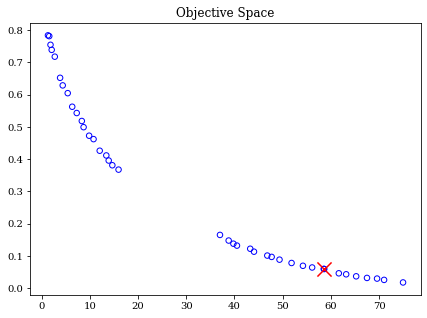

In [144]:
print("Best regarding Pseudo Weights: Point \ni = %s\nF = %s" % (i, F[i]))

plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='blue')
plt.scatter(F[i, 0], F[i, 1], marker="x", color="red", s=200)
plt.title("Objective Space")
plt.show()

# **Part IV: Analysis of Convergence** <a class='anchor' id='PT4'></a>

Great! So far, we have executed an algorithm and already obtained a solution set. But let us not stop here without knowing how the algorithm has performed. This will also answer how we should define a termination criterion if we solve the problem again. The convergence analysis shall consider two cases,
* i) the Pareto-front is not known, or
* ii) the Pareto-front has been derived analytically, or a reasonable approximation exists.

## Result

To further check how close the results match the analytically derived optimum, we have to convert the objective space values to the original definition where the second objective
$ f_2 $ was maximized. Plotting then the Pareto-front shows how close the algorithm was able to converge.

In [145]:
from pymoo.util.misc import stack

class MyTestProblem(MyProblem):

    def _calc_pareto_front(self, flatten=True, *args, **kwargs):
        f2 = lambda f1: ((f1/100) ** 0.5 - 1)**2
        F1_a, F1_b = np.linspace(1, 16, 300), np.linspace(36, 81, 300)
        F2_a, F2_b = f2(F1_a), f2(F1_b)

        pf_a = np.column_stack([F1_a, F2_a])
        pf_b = np.column_stack([F1_b, F2_b])

        return stack(pf_a, pf_b, flatten=flatten)

    def _calc_pareto_set(self, *args, **kwargs):
        x1_a = np.linspace(0.1, 0.4, 50)
        x1_b = np.linspace(0.6, 0.9, 50)
        x2 = np.zeros(50)

        a, b = np.column_stack([x1_a, x2]), np.column_stack([x1_b, x2])
        return stack(a,b, flatten=flatten)

problem = MyTestProblem()

For IGD, the Pareto front needs to be known or to be approximated. In our framework, the Pareto front of **test problems** can be obtained by:

In [146]:
pf_a, pf_b = problem.pareto_front(use_cache=False, flatten=False)

In [147]:
pf = problem.pareto_front(use_cache=False, flatten=True)

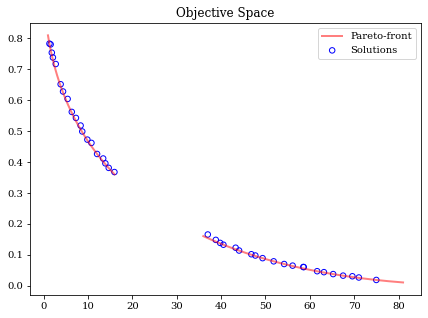

In [148]:
plt.figure(figsize=(7, 5))
plt.scatter(F[:, 0], F[:, 1], s=30, facecolors='none', edgecolors='b', label="Solutions")
plt.plot(pf_a[:, 0], pf_a[:, 1], alpha=0.5, linewidth=2.0, color="red", label="Pareto-front")
plt.plot(pf_b[:, 0], pf_b[:, 1], alpha=0.5, linewidth=2.0, color="red")
plt.title("Objective Space")
plt.legend()
plt.show()

Whether the optimum for your problem is known or not, we encourage all end-users of pymoo not to skip the analysis of the obtained solution set. Visualizations for high-dimensional objective spaces (in design and/or objective space) are also provided and shown [here.](https://pymoo.org/visualization/index.html)

In **Part II**, we have run the algorithm without storing, keeping track of the optimization progress, and storing information. However, for analyzing the convergence, historical data need to be stored. One way of accomplishing that is enabling the
<span style='color:hotpink'>save_history</span>
flag, which will store a deep copy of the algorithm object in each iteration and save it in the
<span style='color:hotpink'>Result</span>
object. This approach is more memory-intensive (especially for many iterations) but has the advantage that any algorithm-dependent variable can be analyzed posteriorly.

A not negligible step is the post-processing after having obtained the results. We strongly recommend not only analyzing the final result but also the algorithm’s behavior. This gives more insights into the convergence of the algorithm.

For such an analysis, intermediate steps of the algorithm need to be considered. This can either be achieved by:

* A
<span style='color:hotpink'>Callback</span>
class storing the necessary information in each iteration of the algorithm.

* Enabling the
<span style='color:hotpink'>save_history</span>
flag when calling the minimize method to store a deep copy of the algorithm’s objective each iteration.

We provide some more details about each variant in our
[convergence](https://pymoo.org/misc/convergence.html)
tutorial. As you might have already seen, we have set
<span style='color:hotpink'>save_history=True</span>
when calling the
<span style='color:hotpink'>minmize</span>
method in this getting started guide and, thus, will you the
<span style='color:hotpink'>history</span>
for our analysis. Moreover, we need to decide what metric should be used to measure the performance of our algorithm. In this tutorial, we are going to use
<span style='color:hotpink'>Hypervolume</span>
and
<span style='color:hotpink'>IGD.</span>
Feel free to look at our
[performance indicators](https://pymoo.org/misc/indicators.html)
to find more information about metrics to measure the performance of multi-objective algorithms.

In [149]:
from pymoo.optimize import minimize

res = minimize(problem,
               algorithm,
               ("n_gen", 40),
               seed=1,
               save_history=True,
               verbose=False)

X, F = res.opt.get("X", "F")

hist = res.history
print(len(hist))

40


From the
<span style='color:hotpink'>history</span>
it is relatively easy to extract the information we need for an analysis.

In [150]:
n_evals = []             # corresponding number of function evaluations\
hist_F = []              # the objective space values in each generation
hist_cv = []             # constraint violation in each generation
hist_cv_avg = []         # average constraint violation in the whole population

for algo in hist:

    # store the number of function evaluations
    n_evals.append(algo.evaluator.n_eval)

    # retrieve the optimum from the algorithm
    opt = algo.opt

    # store the least contraint violation and the average in each population
    hist_cv.append(opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())

    # filter out only the feasible and append and objective space values
    feas = np.where(opt.get("feasible"))[0]
    hist_F.append(opt.get("F")[feas])

## Constraint Satisfaction

First, let us quickly see when the first feasible solution has been found:



In [151]:
k = np.where(np.array(hist_cv) <= 0.0)[0].min()
print(f"At least one feasible solution in Generation {k} after {n_evals[k]} evaluations.")

At least one feasible solution in Generation 0 after 40 evaluations.


Because this problem does not have much complexity, a feasible solution was found right away. Nevertheless, this can be entirely different for your optimization problem and is also worth being analyzed first.

Whole population feasible in Generation 8 after 120 evaluations.


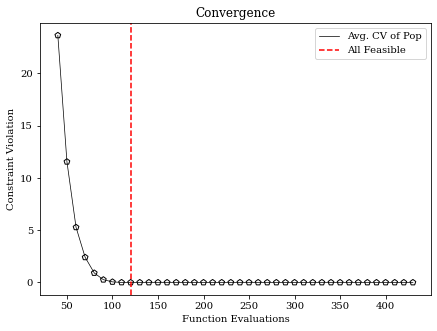

In [152]:
# replace this line by `hist_cv` if you like to analyze the least feasible optimal solution and not the population
vals = hist_cv_avg

k = np.where(np.array(vals) <= 0.0)[0].min()
print(f"Whole population feasible in Generation {k} after {n_evals[k]} evaluations.")

plt.figure(figsize=(7, 5))
plt.plot(n_evals, vals,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, vals,  facecolor="none", edgecolor='black', marker="p")
plt.axvline(n_evals[k], color="red", label="All Feasible", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Constraint Violation")
plt.legend()
plt.show()

## Pareto-front is unknown

If the Pareto-front is not known, we can not know if the algorithm has converged to the true optimum or not. At least not without any further information. However, we can see when the algorithm has made most of its progress during optimization and thus if the number of iterations should be less or more. Additionally, the metrics serve to compare two algorithms with each other.

In multi-objective optimization **normalization** the very important. For that reason, you see below that the Hypervolume is based on a normalized set normalized by the bounds (idea) More details about it will be shown in Part IV.

## Hypvervolume (HV)

Hypervolume is a very well-known performance indicator for multi-objective problems. It is Pareto-compliant and is based on the volume between a predefined reference point and the solution provided. Therefore, hypervolume requires defining a reference point
<span style='color:hotpink'>ref_point,</span>
which shall be larger than the maximum value of the Pareto front.

In [153]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

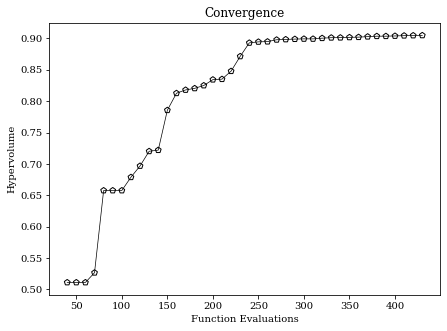

In [154]:
from pymoo.indicators.hv import Hypervolume

metric = Hypervolume(ref_point= np.array([1.1, 1.1]),
                     norm_ref_point=False,
                     zero_to_one=True,
                     ideal=approx_ideal,
                     nadir=approx_nadir)

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()

> **Note**
<br>
Hypervolume becomes computationally expensive with increasing dimensionality. The exact hypervolume can be calculated efficiently for 2 and 3 objectives. For higher dimensions, some researchers use a hypervolume approximation, which is not available yet in pymoo.



## Running Metric

Another way of analyzing a run when the true Pareto front is **not** known is the recently proposed
[running metric.](https://www.egr.msu.edu/~kdeb/papers/c2020003.pdf)
The running metric shows the difference in the objective space from one generation to another and uses the algorithm’s survival to visualize the improvement. This metric is also being used in pymoo to determine the termination of a multi-objective optimization algorithm if no default termination criteria have been defined.

For instance, this analysis reveals that the algorithm improved from the 4th to the 5th generation significantly.

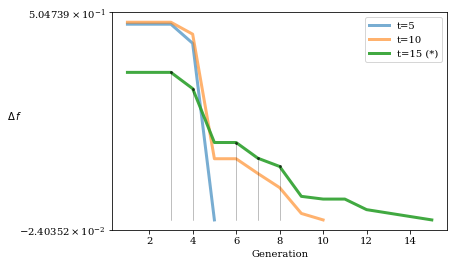

In [155]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetric(delta_gen=5,
                        n_plots=3,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history[:15]:
    running.notify(algorithm)

Plotting until the final population shows the algorithm seems to have more a less converged, and only a slight improvement has been made.

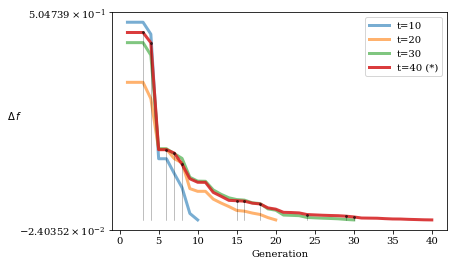

In [156]:
from pymoo.util.running_metric import RunningMetric

running = RunningMetric(delta_gen=10,
                        n_plots=4,
                        only_if_n_plots=True,
                        key_press=False,
                        do_show=True)

for algorithm in res.history:
    running.notify(algorithm)

## Pareto-front is known or approximated

### IGD/GD/IGD+/GD+

The Pareto-front for a problem can either be provided manually or directly implemented in the
<span style='color:hotpink'>Problem,</span>
definition to analyze the run on the fly. Here, we show an example of using the history of the algorithm as an additional post-processing step.

For real-world problems, you have to use an **approximation.** An approximation can be obtained by running an algorithm a couple of times and extracting the non-dominated solutions out of all solution sets. If you have only a single run, an alternative is to use the obtained non-dominated set of solutions as an approximation. However, the result only indicates how much the algorithm’s progress in converging to the final set.

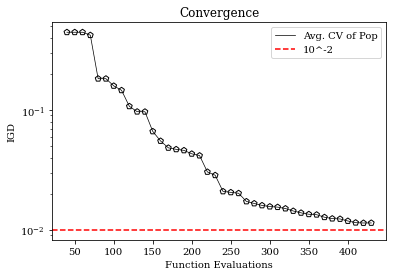

In [157]:
from pymoo.indicators.igd import IGD

metric = IGD(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD")
plt.yscale("log")
plt.legend()
plt.show()

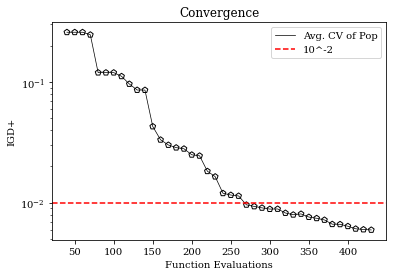

In [158]:
from pymoo.indicators.igd_plus import IGDPlus

metric = IGDPlus(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD+")
plt.yscale("log")
plt.legend()
plt.show()

# **Part V: Some more useful Information** <a class='anchor' id='PT5'></a>

This getting started guide has covered the most common steps of a multi-objective optimization scenario. More details about each of the topics shown in this guide are available in the corresponding topic section

* Interface: An overview over the most important parameters of the interface.

* Problems: A guide how to implement your own custom problem and how to use test problems alrady being implemented.

* Algorithms: Information about all algorithms and how to use them for optimization.

* Operators: An overview of evolutionary operators.

* Customization: How to design your custom evolutionary operators to develop an efficient genetic algorithm for your specific optimization problem.

* Visualization: Different techniques for visualization the results of an optimization run or a single solution.

* Multi-Criteria Decision Making: How to select a solution from a solution set.

* FAQ: Frequently asked questions.

# **Source Code** <a class='anchor' id='SC'></a>

In this guide, we have provided a couple of options for defining your problem and how to run the optimization. You might have already copied the code into your IDE. However, if not, the following code snippets cover the problem definition, algorithm initializing, solving the optimization problem, and visualization of the non-dominated set of solutions altogether.

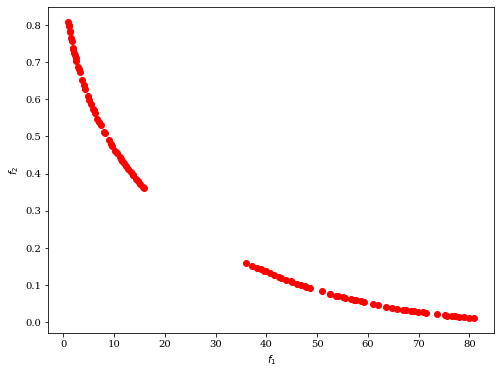

In [159]:
import numpy as np

from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.core.problem import ElementwiseProblem
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter


class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2, -2]),
                         xu=np.array([2, 2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0] ** 2 + x[1] ** 2)
        f2 = (x[0] - 1) ** 2 + x[1] ** 2

        g1 = 2 * (x[0] - 0.1) * (x[0] - 0.9) / 0.18
        g2 = - 20 * (x[0] - 0.4) * (x[0] - 0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

algorithm = NSGA2(pop_size=100)

res = minimize(problem,
               algorithm,
               ("n_gen", 100),
               verbose=False,
               seed=1)

plot = Scatter()
plot.add(res.F, color="red")
plot.show()

# Interface

The functional interface of pymoo is based on a method called minimize, which abstracts any kind of optimization procedure in the framework. Each component of the functional interface is described in detail in the following. The guide starts with the minimize function itself, continues with the required and optional parameters, and ends with the Result object.

Overview

minimize: This is the functional interface to optimized any kind of problem. The function itself two positional parameters, problem and algorithm, and a few more optional parameters.

Problem: A problem object defining what to be optimized.

Algorithm: The algorithm which shall be used for optimization. Make sure to choose a suitable algorithm for your optimization problem to ensure efficient convergence.

Termination Criterion: When the algorithm should be considered as terminated. The termination can be simply based on the algorithm’s number of iterations, an upper bound of function evaluations, or more sophisticated procedures.

Callback: How to access intermediate result during optimization to keep track of the algorithm itself or modify attributes of the algorithm dynamically.

Display: When verbose=True, then the algorithm prints out some information in each iteration. The printout is different depending on if it is a single or multi-objective optimization problem and if the Pareto-front is known or unknown.

Result: The result object being returned by the minimize method. Access to the optimum/optima found and some more information such as the running time or even the whole algorithm’s run history.

Please note that besides the functional interface, pymoo also has an object-oriented interface (more information here) for running an optimization algorithm. Both have their upsides and downsides, and one can be more convenient to use than another in specific situations. The functional interface allows optimization just in a few lines; the object-oriented interface allows quickly to alter an existing algorithm’s behavior.

# Minimize

The minimize function provides the external interface for any kind of optimization to be performed. The minimize method arguments and options look as follows:

In [ ]:
def minimize(problem,
             algorithm,
             termination=None,
             seed=None,
             verbose=False,
             display=None,
             callback=None,
             return_least_infeasible=False,
             save_history=False
             )

* problem: A Problem object that contains the problem to be solved.

* algorithm: An Algorithm objective which represents the algorithm to be used.

* termination: A Termination object or a tuple defining when the algorithm has terminated. If not provided, a default termination criterion will be used. Purposefully, we list the termination as a parameter and not an option. Specific algorithms might need some refinement of the termination to work reliably.

* seed: Most algorithms underly some randomness. Setting the seed to a positive integer value ensures reproducible results. If not provided, a random seed will be set automatically, and the used integer will be stored in the Result object.

* verbose: Boolean value defining whether the output should be printed during the run or not.

* display: You can overwrite what output is supposed to be printed in each iteration. Therefore, a custom Display object can be used for customization purposes.

* save_history: A boolean value representing whether a snapshot of the algorithm should be stored in each iteration. If enabled, the Result object contains the history.

* return_least_infeasible: Whether if the algorithm can not find a feasible solution, the least infeasible solution should be returned. By default False.

Note, the minimize function creates a deep copy of the algorithm object before the run. This ensures that two independent runs with the same algorithm and same random seed have the same results without any side effects. However, to access the algorithm’s internals, you can access the object being used by res.algorithm where res is an instance of the Result object.



# Minimize API

In [43]:
pymoo.optimize.minimize(problem, algorithm,
termination=None, copy_algorithm=True, copy_termination=True, **kwargs)

NameError: name 'pymoo' is not defined

Minimization of function of one or more variables, objectives and constraints.

This is used as a convenience function to execute several algorithms with default settings which turned out to work for a test single. However, evolutionary computations utilizes the idea of customizing a meta-algorithm. Customizing the algorithm using the object oriented interface is recommended to improve the convergence.

# Problem

There exist a couple of different ways for defining an optimization problem in pymoo. In contrast to other optimization frameworks in Python, the preferred way is to define an object. However, a problem can also be defined by functions as shown here. Most algorithms in pymoo are population-based, which implies in each generation, not a single but multiple solutions are evaluated. Thus, the problem implementation retrieves the set of solutions to provide the most flexibility to the end-user. This flexibility allows you to implement a custom parallelization and thus to use your hardware most efficiently. Three different ways of defining a problem are shown below:

Overview

Problem: Object-oriented definition Problem which implements a method evaluating a set of solutions.

ElementwiseProblem: Object-oriented definition ElementwiseProblem which implements a function evaluating a single solution at a time.

FunctionalProblem: Define a problem FunctionalProblem by using a function for each objective and constraint.

Next, we define an unconstrained optimization problem with two variables and two objectives. Because the lower and upper bounds are identical for both variables, only a float value is passed to the Problem constructor. Assuming the Algorithm has a population size N, the input variable x is a two-dimensional matrix with the dimensions (N,2). The input has two columns because the optimization problem has n_var=2. Thus, to evaluated the problem makes use of the vectorized calculations [:, 0] and [:, 1] to select the first and second variables for each row in the input matrix x.

In [29]:
import numpy as np
from pymoo.core.problem import Problem

class MyProblem(Problem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         xl=-2.0,
                         xu=2.0)

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[:, 0]**2 + x[:, 1]**2)
        f2 = (x[:, 0]-1)**2 + x[:, 1]**2
        out["F"] = np.column_stack([f1, f2])

Below we define a constrained optimization problem with two variables and two objectives. Here, the problem is defined element-wise. The lower and upper bounds, xl and xu, are defined using a vector with a length equal to the number of variables. The input x is a one-dimensional array of length two and is called N times in each iteration for the algorithm discussed above.

In [30]:
import numpy as np
from pymoo.core.problem import ElementwiseProblem

class MyProblem(ElementwiseProblem):

    def __init__(self):
        super().__init__(n_var=2,
                         n_obj=2,
                         n_constr=2,
                         xl=np.array([-2,-2]),
                         xu=np.array([2,2]))

    def _evaluate(self, x, out, *args, **kwargs):
        f1 = 100 * (x[0]**2 + x[1]**2)
        f2 = (x[0]-1)**2 + x[1]**2

        g1 = 2*(x[0]-0.1) * (x[0]-0.9) / 0.18
        g2 = - 20*(x[0]-0.4) * (x[0]-0.6) / 4.8

        out["F"] = [f1, f2]
        out["G"] = [g1, g2]


problem = MyProblem()

> **Tip**
<br>
For more information, please look at the problem tutorial. Moreover, a number of test problems frequently being use for benchmarking the performance of an algorithm are listed here

# Algorithm

After having defined the problem, a suitable algorithm for optimizing it has to be found. This can be challenging and might require some literature research. pymoo offers quite a few standard implementations of well-known algorithms that can be quite useful in obtaining quick results or prototyping.

Each algorithm has different parameters to be initialized. For the functional interface, the algorithm object needs to be passed to the minimize method, starting the optimization run. For instance, for NSGA2 the object can be initialized as follows:

In [42]:
from pymoo.algorithms.moo.nsga2 import NSGA2

algorithm = NSGA2()

For more details about algorithms, please have a look at this [tutorial.](https://pymoo.org/algorithms/index.html)

# Termination Criterion

# Haven't looked into further YET!